# Exercise 1
Due date: 2022-01-31

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"01_Classification_Goup42_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or google form (LPC).

In [181]:
group_name = "Group12"
group_members = ["Aziz", 
         "Rathore", 
         "Sohrabi"]

**Chapter 3 – Classification**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/01_Classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [93]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# MNIST

In [94]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [95]:
X, y = mnist["data"], mnist["target"]

In [96]:
# X is a pandas dataframe
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(70000, 784)


In [97]:
y.shape

(70000,)

In [98]:
# the images are 28x28 pixels
28 * 28

784

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

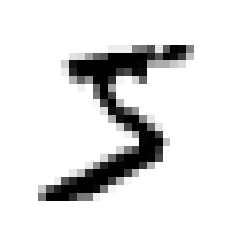

In [100]:
%matplotlib inline

# to get the values of the dataframe X, call X.values.
# X.values[0] gives the pixel values for the first image
plot_digit(X.values[0])

In [101]:
# the label of the first image.
# note that it's a string and not an int
y[0]

'5'

In [102]:
y = y.astype(np.uint8)

In [103]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

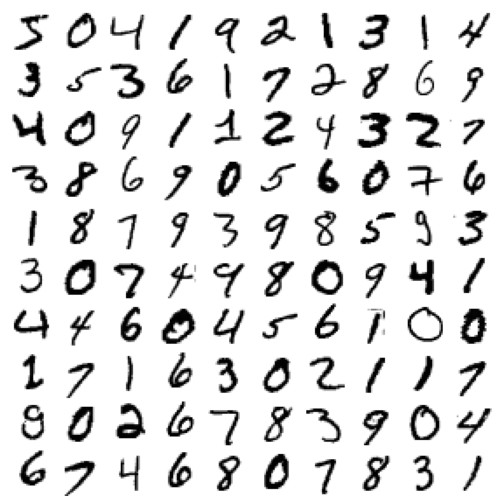

In [104]:
plt.figure(figsize=(9,9))
example_images = X[:100].values
plot_digits(example_images, images_per_row=10)
plt.show()

In [105]:
# note it is an int now
y[0]

5

In [106]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary classifier
Let's train a classifier to predict the digit is a 5 or not.

In [107]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Task 1: SGD Classifier
1) Create an [SGD Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) `sgd_clf` with the following hyperparameters:  `max_iter=1000`, `tol=1e-3`, `random_state=42`  
2) Fit the classifier by calling its `fit` function with `X_train` and `y_train_5` as the parameters. This might take a while.

In [108]:
from sklearn.linear_model import SGDClassifier

In [109]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [110]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)

In [111]:
# fit the sgd_clf
sgd_clf.fit(X_train,y_train_5)

SGDClassifier()

In [112]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

In [113]:
# let's test the model on an example. Feel free to play around and try more.

In [182]:
sgd_clf.predict(X_test[0:1])

array([False])

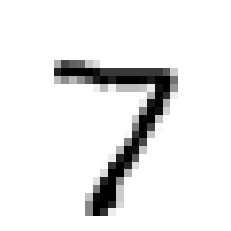

In [183]:
plot_digit(X_test[0:1].values)

## Task 2: Cross Validation of SGD Classifier

1) Calculate the [cross-validation score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) of the `sgd_clf` classifier with the train data. Use `cv=3` and `scoring="accuracy"`.    

2) a) Explain what cross validation is.

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [193]:
# cross val score 
print(cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

[0.96035 0.95565 0.9525 ]


In [119]:
task2a_explanation = """a technique used in machine learning to assess the peroformance of a model on a subset of the inupt(training)
data that the model has not yet seen"""

In [120]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

Here is some code for a [stratified k-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

2) b) Explain stratified cross validation

In [121]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.values[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.values[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96785
0.96555
0.9648


In [122]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [123]:
task2b_explanation = """a form of cross validation using stratified sampling to ensure same features across training and
test data sets to make sure that no values are over or under represented in train-test data sets. Stratified cross validation
gives a more accurrate estimation of model's performance"""

In [124]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

# Never 5 Classifier
This classifier always predicts 0

In [125]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [126]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Task 3
Explain why the "never 5 classifier" still has such "high" scores.

In [127]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [128]:
task3_explanation = """ The classifier is trained on a set that contains images of digit 5 only and then is evaluated on another set
to classify images as either 5 or not 5. The accuracy number can be interprested as 10% of the images in the set are digit 5, and
the data is skewed meaning accurracy as a scoring measure is not very accurate representation of the model performance here """

In [129]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

Back to the real classifier: `sgd_clf`

In [130]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## Task 4
Calculate the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for 
- the train and predicted values 
- the train and perfect predictions 

Explain what the entries of the confusion matrix mean.

In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [133]:
# confusion matrix for predicted values
confusion_matrix(y_train_5, y_train_pred)

array([[54155,   424],
       [ 1707,  3714]])

In [134]:
# confusion matrix for perfect predictions
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [135]:
task4_explanation = """The first row is negative class: 54,155 of them were correctly classified as true negatives, 
while the remaining 424 were wrongly classified as false positives. The second row considers the the positive class: 
  1,707 were wrongly classified as false negatives, while the remaining 3,714 were correctly classified as true positives. """

In [136]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 5
Calculate precision and recall scores for training and predicted values

In [137]:
from sklearn.metrics import precision_score, recall_score

In [138]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [139]:
p_score = precision_score(y_train_5, y_train_pred)
r_score = recall_score(y_train_5, y_train_pred)
print(p_score)
print(r_score)

0.8975350410826486
0.6851134477033758


In [140]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 6
Using the values from the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), calculate 
- the rate of false positives, true positives, false negatives, true negatives 
- accuracy 
- precision 

In [141]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [142]:
FPR = 424/(424+54155)
TPR = 3714/(3714+1707)
FNR = 1707/(3714+1707)
TNR = 54155/(54155+424)
ACCURACY = (54155+3714)/(3714+424+1707+54155)
PRECISION = 3714/(3714+424)
print(FPR)
print(TPR)
print(FNR)
print(TNR)
print(ACCURACY)
print(PRECISION)

0.007768555671595302
0.6851134477033758
0.3148865522966242
0.9922314443284047
0.9644833333333334
0.8975350410826486


In [143]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 7
Calculate the f1 score. 

In [144]:
from sklearn.metrics import f1_score

In [145]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [146]:
f1_score(y_train_5, y_train_pred)

0.7770687310388116

In [147]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 8
Explain what the scores in task 5 and 6 (accuracy, precision, f1) describe.

In [148]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [149]:
task8_explanation = """ Accuracy score means the number of correctly classified values over the total values in the set. 
Precision score means that when the classification model claims an image represents a 5, 
it is correct only 89.7% of the time. The f1 score represents the harmonic mean of the precision and recall meaning it combines
the precision and recall score into a single convenient metric. """

In [150]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

# Setting a Threshold on the Prediction

In [151]:
# if you want to train sgd_clf again or had troubles with it
# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# sgd_clf.fit(X_train,y_train_5)

In [152]:
some_digit = X_train.iloc[0]

In [153]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2164.22030239])

In [154]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [155]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [156]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [157]:
y_scores

array([  1112.46971618, -18371.67592848, -33412.39103155, ...,
         8335.9713763 ,  -4704.03441346, -12500.08918871])

In [158]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

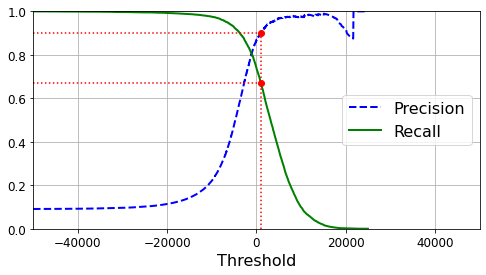

In [159]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

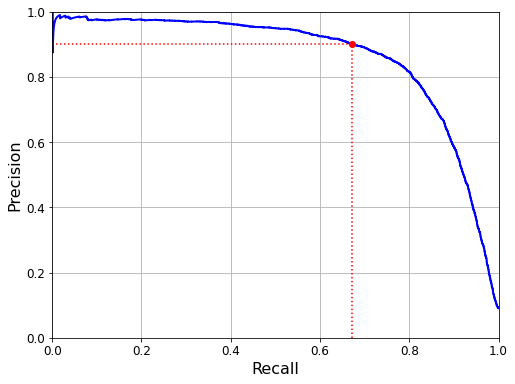

In [160]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [161]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [162]:
threshold_90_precision

987.3979756530086

In [163]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [164]:
precision_score(y_train_5, y_train_pred_90)

0.900197628458498

In [165]:
recall_score(y_train_5, y_train_pred_90)

0.6722007009776794

# ROC curves

We can now go on to calculate the [Receiver Operating Characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). 
For a good explanation see also [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).

Basically instead of plotting measures like precision and recall as a function of the threshold, we plot the true positive rate (recall) vs the false positive rate (fall-out).

In [166]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

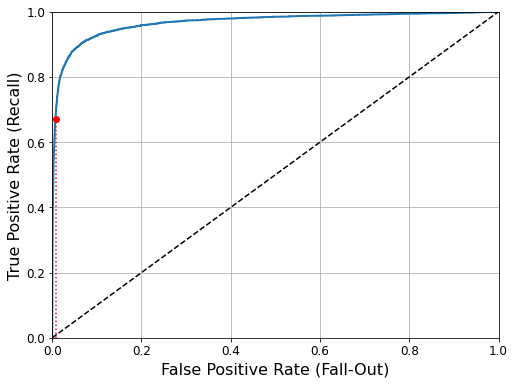

In [167]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

The area under the curve (auc) is a measure of how good the model is.

In [168]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9671567364537266

Let's compare the SGD model with a random forest.

In [169]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [170]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

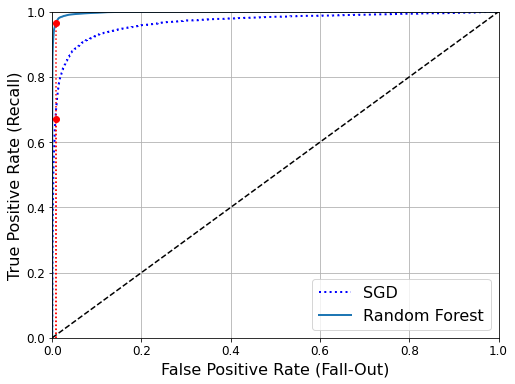

In [171]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [172]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [173]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [174]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Textbook exercises

**Exercise 1**

Feel free to play around with this question.
Try to build a different classifier. 

__Hint__: the KNeighborsClassifier works quite well for this task. Good hyperparameters are `{'n_neighbors': 4, 'weights': 'distance'}`

In [175]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights = "distance")
knn.fit(X_train,y_train_5)
knn.predict(X_test[0:1])

array([False])

In [211]:
from sklearn.model_selection import GridSearchCV


In [177]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

**Exercise 2**
(Optional)

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by five pixels. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [178]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [179]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

In [195]:
#y_pred = knn_clf.predict(X_test)
#accuracy_score(y_test, y_pred)

# Exercise 2 Solution

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)